Extract Sv from Polar Front data
This notebook will be used to calculate the mean backscatter value for the 2021 and 2022 data from the Sailbuoy surveys at the Polar Front area in the Barents Sea. This notebook uses the function developed in 2013-2014ANMPA.

In [1]:
import glob
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['font.size']= 15
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 15

## Load datasets

### Iskant 2021

In [5]:
# make a list of filenames
data_path = "E:/PolarFront-Exports/Iskant2021/ExtractSv/"
csv_file_names = sorted(glob.glob(data_path + 'Mission Plan ES200-7CDK-split-PolarFront-Phase0-D2021*.csv'))

# Combine files
Iskant_21 = pd.concat([pd.read_csv(f, skiprows=0) for f in csv_file_names[:-2]], axis=0)

# Combine date and time column
Iskant_21['datetime'] = pd.to_datetime(Iskant_21['Date_M'].apply(str) + Iskant_21['Time_M'], format='%Y%m%d %H:%M:%S.%f')
Iskant_21['platform'] = 'Sailbuoy Iskant 2021'

### Iskant 2022

In [9]:
# make a list of filenames
data_path = "E:/PolarFront-Exports/Iskant2022/Export_WeakStrong_schools/"
csv_file_names = sorted(glob.glob(data_path + '*-Phase0-D2022*.csv'))

# Combine files
Iskant_22 = pd.concat([pd.read_csv(f, skiprows=0) for f in csv_file_names], axis=0)

# Combine date and time column
Iskant_22['datetime'] = pd.to_datetime(Iskant_22['Date_M'].apply(str) + Iskant_22['Time_M'], format='%Y%m%d %H:%M:%S.%f')

Iskant_22['platform'] = 'Sailbuoy Iskant 2022'

In [31]:
Iskant_22

,Region_ID,Region_name,Region_class,Process_ID,Sv_mean,NASC,Sv_max,Sv_min,Sv_noise,NASC_noise,...,Region_top_altitude_min,Region_top_altitude_max,Region_top_altitude_mean,Center_of_mass,Inertia,Proportion_occupied,Equivalent_area,Aggregation_index,datetime,platform
0,1,Region 1,SSL Strong,278,-59.483641,1011.759468,-45.698140,-91.482005,-958.571193,0.0,...,45.5,61.1,56.442101,52.274941,67.360709,0.993565,1968.032678,0.000508,2022-05-20 00:36:31.693,Sailbuoy Iskant 2022
1,2,Region 2,SSL Strong,278,-61.449519,147.328212,-49.151646,-86.113636,-955.382851,0.0,...,27.2,37.8,32.202564,69.732610,4.522084,0.969159,103.404376,0.009671,2022-05-20 00:34:24.163,Sailbuoy Iskant 2022
2,3,Region 3,SSL Strong,278,-65.032456,24.121087,-55.888837,-81.123007,-953.903310,0.0,...,24.2,25.3,25.037500,76.100965,0.503199,0.987805,9.645876,0.103671,2022-05-20 00:33:37.602,Sailbuoy Iskant 2022
3,4,Region 4,SSL Strong,278,-60.283607,77.259284,-51.153855,-84.424604,-956.578891,0.0,...,35.3,36.0,35.841282,65.127662,0.559596,0.941176,10.384174,0.096300,2022-05-20 00:35:57.283,Sailbuoy Iskant 2022
4,5,Region 5,SSL Strong,278,-58.117601,529.544292,-44.616814,-97.111771,-966.081643,0.0,...,68.4,75.4,72.831441,30.511525,10.011554,0.993950,636.756874,0.001570,2022-05-20 01:06:30.063,Sailbuoy Iskant 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,30,Region 30,SSL weak,592,-77.248924,19.538908,-63.671322,-90.750648,-952.013942,0.0,...,21.9,29.8,25.781496,84.527414,49.122511,0.895302,3018.222940,0.000331,2022-07-24 13:06:30.358,Sailbuoy Iskant 2022
24,31,Region 31,SSL weak,592,-77.490487,8.252019,-64.612014,-87.886413,-951.233647,0.0,...,7.9,18.9,13.628620,90.763059,18.701270,0.854869,1243.853991,0.000804,2022-07-24 13:36:31.193,Sailbuoy Iskant 2022
25,32,Region 32,SSL weak,592,-76.811231,2.552465,-64.681493,-87.427911,-951.258522,0.0,...,8.1,13.4,10.485189,90.758920,3.596917,0.893240,321.676113,0.003109,2022-07-24 14:06:31.352,Sailbuoy Iskant 2022
26,33,Region 33,SSL weak,592,-77.428164,4.539813,-66.277833,-87.339009,-951.313215,0.0,...,7.7,14.6,11.298687,90.989252,5.412148,0.862169,712.480633,0.001404,2022-07-24 14:36:31.269,Sailbuoy Iskant 2022


# Location data

In [33]:
SB_Iskant = pd.read_excel("E:/PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_iskant/datalogger/DATA_SBIskant2022_PF.xlsx", header=0, usecols=['Time','Lat','Long'])

In [34]:
SB_Iskant['Time'] = pd.to_datetime(SB_Iskant.Time)
SB_Iskant22_times = SB_Iskant.set_index(['Time']).resample('1min').interpolate()

# Combine location + data

In [35]:
index = []

#select iskant 22
isk_22 = Iskant_22[Iskant_22['platform']=='Sailbuoy Iskant 2022'].reset_index()
for ind in range(len(isk_22)):
    ind_index = SB_Iskant22_times.index.get_loc(isk_22.datetime[ind], method="nearest")
    index = np.append(index, ind_index)
    
#Reset index
SB_Iskant22_times = SB_Iskant22_times.reset_index()

# New df with GPS+Sv data
Isk_22_df = pd.DataFrame()
long = SB_Iskant22_times['Long'][index]
lat = SB_Iskant22_times['Lat'][index]
Isk_22_df['Time'] = isk_22.datetime
Isk_22_df['Long'] = np.array(long)
Isk_22_df['Lat'] = np.array(lat)
Isk_22_df['Sv_mean'] = isk_22.Sv_mean
Isk_22_df['Region_class'] = isk_22.Region_class

In [36]:
Isk_22_df['Region_class'].unique()

array(['SSL Strong', 'SSL weak'], dtype=object)

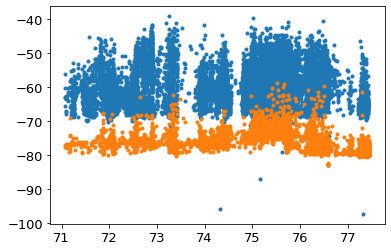

In [39]:
strong = Isk_22_df[Isk_22_df['Region_class']=='SSL Strong']
weak = Isk_22_df[Isk_22_df['Region_class']=='SSL weak']

plt.plot(strong['Lat'], strong['Sv_mean'], '.')
plt.plot(weak['Lat'], weak['Sv_mean'], '.')
#sns.lineplot(data=Iskant_21, x='datetime', y='Sv_mean', hue='Layer_depth_min')
#date_form = DateFormatter("%b %d")
#ax.xaxis.set_major_formatter(date_form)